# Data Cleaning and Preparation

# **T. Prathima**, Assistant Professor, Dept. of IT, CBIT(A)

Reference:
Python for Data Analysis DATA WRANGLING WITH PANDAS, NUMPY, AND IPYTHON
Author: Wes McKinney

*   During the course of doing data analysis and modeling, a significant amount of time is spent on data preparation: loading, cleaning, transforming, and rearranging. 
*   Such tasks are often reported to take up 80% or more of an analyst’s time.
*   Sometimes the way that data is stored in files or databases is not in the right format for a particular task.
*   Python language features, provides you with a high-level, flexible, and fast set
of tools to enable you to manipulate data into the right form.

In [ ]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

## Handling Missing Data

*   Missing data occurs commonly in many data analysis applications
*   all of the descriptive statistics on pandas objects exclude missing data by default.
*   For numeric data, pandas uses the floating-point
value NaN (Not a Number) to represent missing data. We call this a sentinel value that
can be easily detected
*   In pandas, missing data is refered to as NA, which stands for not available. 
*   In statistics applications,NA data may either be data that does not exist or that exists but was not observed
(through problems with data collection, for example).
*   When cleaning up data for analysis, it is often important to do analysis on the missing data itself to identify data collection problems or potential biases in the data caused by missing data.



In [ ]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado',' ','','NA','NA'])
print(string_data)
string_data.isnull()

0     aardvark
1    artichoke
2          NaN
3      avocado
4             
5             
6           NA
7           NA
dtype: object


0    False
1    False
2     True
3    False
4    False
5    False
6    False
7    False
dtype: bool

In [ ]:
#The built-in Python None value is also treated as NA in object arrays:
string_data[0] = None
string_data.isnull()

0     True
1    False
2     True
3    False
4    False
5    False
6    False
7    False
dtype: bool

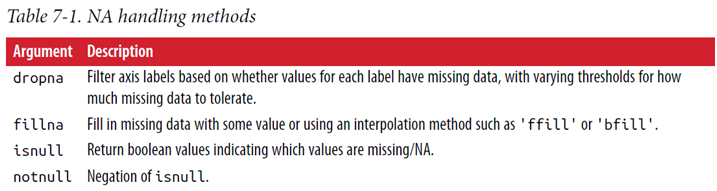

### Filtering Out Missing Data

In [ ]:
#There are a few ways to filter out missing data. While you always have the 
#option to do it by hand using pandas.isnull and boolean indexing, the dropna 
#can be helpful. On a Series, it returns the Series with only the non-null data 
#and index values:

from numpy import nan as NA
data = pd.Series([1, NA, 3.5, NA, 7])
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [ ]:
data.notnull()

0     True
1    False
2     True
3    False
4     True
dtype: bool

In [ ]:
#We can also get the non null values in series as below:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [ ]:
#With DataFrame objects, things are a bit more complex. You may want to 
#drop rows or columns that are all NA or only those containing any NAs. 
#dropna by default drops any row containing a missing value:

data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.]])
cleaned = data.dropna()
print(data)
cleaned

     0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0


,0,1,2
0,1.0,6.5,3.0


In [ ]:
#Passing how='all' will only drop rows that are all NA:
#Passing how='any' will only drop rows if any one NA exists in that row
print(data)
data.dropna(how='all')

     0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0


,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [ ]:
#To drop columns in the same way, pass axis=1:
data[4] = NA
print(data)
data.dropna(axis=1, how='all')

     0    1    2   4
0  1.0  6.5  3.0 NaN
1  1.0  NaN  NaN NaN
2  NaN  NaN  NaN NaN
3  NaN  6.5  3.0 NaN


,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [ ]:
#A related way to filter out DataFrame rows tends to concern time series data. 
#Suppose you want to keep only rows containing a certain number of observations. 
#You can indicate this with the thresh argument:

df = pd.DataFrame(np.random.randn(7, 3))
print(df)
df.iloc[:4, 1] = NA
print("\niloc[:4,1]\n",df)
df.iloc[:2, 2] = NA
#print(df)
#df.dropna()
#df.dropna(thresh=2)
df.dropna(thresh=3)

          0         1         2
0 -0.204708  0.478943 -0.519439
1 -0.555730  1.965781  1.393406
2  0.092908  0.281746  0.769023
3  1.246435  1.007189 -1.296221
4  0.274992  0.228913  1.352917
5  0.886429 -2.001637 -0.371843
6  1.669025 -0.438570 -0.539741

iloc[:4,1]
           0         1         2
0 -0.204708       NaN -0.519439
1 -0.555730       NaN  1.393406
2  0.092908       NaN  0.769023
3  1.246435       NaN -1.296221
4  0.274992  0.228913  1.352917
5  0.886429 -2.001637 -0.371843
6  1.669025 -0.438570 -0.539741


,0,1,2
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


### Filling In Missing Data

In [ ]:
#Rather than filtering out missing data (and potentially discarding other data 
#along with it), you may want to fill in the “holes” in any number of ways. 
#For most purposes, the fillna method is the workhorse function to use. 
#Calling fillna with a constant replaces missing values with that value:
df.fillna(120)

,0,1,2
0,-0.204708,120.000000,120.000000
1,-0.555730,120.000000,120.000000
2,0.092908,120.000000,0.769023
3,1.246435,120.000000,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


In [ ]:
#Calling fillna with a dict, you can use a different fill value for each column:
df.fillna({1: 0.5, 2: 23})

,0,1,2
0,-0.204708,0.500000,23.000000
1,-0.555730,0.500000,23.000000
2,0.092908,0.500000,0.769023
3,1.246435,0.500000,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


In [ ]:
#fillna returns a new object, but you can modify the existing object in-place:
_ = df.fillna(0, inplace=True)
df

,0,1,2
0,-0.204708,0.000000,0.000000
1,-0.555730,0.000000,0.000000
2,0.092908,0.000000,0.769023
3,1.246435,0.000000,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


In [ ]:
df.notnull()

,0,1,2
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
5,True,True,True
6,True,True,True


In [ ]:
df = pd.DataFrame(np.random.randn(6, 3))
print(df)
print(df.iloc[2:, 1])

          0         1         2
0  0.476985  3.248944 -1.021228
1 -0.577087  0.124121  0.302614
2  0.523772  0.000940  1.343810
3 -0.713544 -0.831154 -2.370232
4 -1.860761 -0.860757  0.560145
5 -1.265934  0.119827 -1.063512
2    0.000940
3   -0.831154
4   -0.860757
5    0.119827
Name: 1, dtype: float64


In [ ]:
#The same interpolation methods available for reindexing can be used with fillna:
#Interpolation is guessing data points that fall within the range of the 
#data you have, i.e. between your existing data points. 
#Extrapolation is guessing data points from beyond the range of your data set.`
df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
print(df)
print(df.fillna(method='ffill'))
df.fillna(method='ffill', limit=2)

          0         1         2
0  0.332883 -2.359419 -0.199543
1 -1.541996 -0.970736 -1.307030
2  0.286350       NaN -0.753887
3  0.331286       NaN  0.069877
4  0.246674       NaN       NaN
5  1.327195       NaN       NaN
          0         1         2
0  0.332883 -2.359419 -0.199543
1 -1.541996 -0.970736 -1.307030
2  0.286350 -0.970736 -0.753887
3  0.331286 -0.970736  0.069877
4  0.246674 -0.970736  0.069877
5  1.327195 -0.970736  0.069877


,0,1,2
0,0.332883,-2.359419,-0.199543
1,-1.541996,-0.970736,-1.307030
2,0.286350,-0.970736,-0.753887
3,0.331286,-0.970736,0.069877
4,0.246674,NaN,0.069877
5,1.327195,NaN,0.069877


In [ ]:
#With fillna you can do lots of other things with a little creativity. 
#For example, you might pass the mean or median value of a Series:
data = pd.Series([1., NA, 3.5, NA, 7])
print(data.mean())
data.fillna(data.mean())

3.8333333333333335


0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

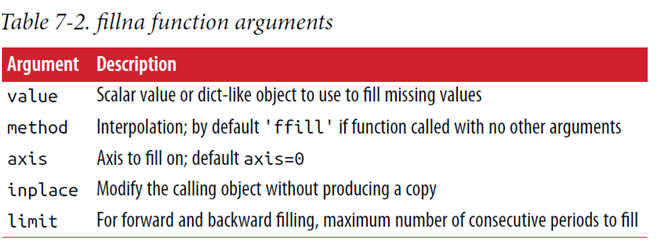

## Data Transformation

### Removing Duplicates

In [ ]:
#Duplicate rows may be found in a DataFrame for any number of reasons.
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [ ]:
#The DataFrame method duplicated returns a boolean Series indicating whether 
#each row is a duplicate (has been observed in a previous row) or not:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [ ]:
#drop_duplicates returns a DataFrame where the duplicated array is False:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [ ]:
#Both of these methods by default consider all of the columns; alternatively, 
#you can specify any subset of them to detect duplicates. Suppose we had an 
#additional column of values and wanted to filter duplicates only based on the 
#'k1' column: 

data['v1'] = range(7)
print(data)
data.drop_duplicates(['k1'])

    k1  k2  v1
0  one   1   0
1  two   1   1
2  one   2   2
3  two   3   3
4  one   3   4
5  two   4   5
6  two   4   6


,k1,k2,v1
0,one,1,0
1,two,1,1


In [ ]:
#duplicated and drop_duplicates by default keep the first observed value 
#combination. Passing keep='last' will return the last one:
data.drop_duplicates(['k1', 'k2'], keep='last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


### Transforming Data Using a Function or Mapping

In [ ]:
#For many datasets, you may wish to perform some transformation based on the 
#values in an array, Series, or column in a DataFrame. Consider the following 
#hypothetical data collected about various kinds of meat:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                              'Pastrami', 'corned beef', 'Bacon',
                              'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [ ]:
#Suppose you wanted to add a column indicating the type of animal that each food
#came from. Let’s write down a mapping of each distinct meat type to the kind of
#animal:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

In [ ]:
#The map method on a Series accepts a function or dict-like object containing a 
#mapping, but here we have a small problem in that some of the meats are 
#capitalized and others are not. Thus, we need to convert each value to 
#lowercase using the str.lower Series method:
lowercased = data['food'].str.lower()
print(type(lowercased))
print(lowercased)
data['animal'] = lowercased.map(meat_to_animal)
data

<class 'pandas.core.series.Series'>
0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object


,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [ ]:
#We could also have passed a function that does all the work:
data['food'].map(lambda x: meat_to_animal[x.lower()])

#Using map is a convenient way to perform element-wise transformations and other
#data cleaning–related operations.

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

### Replacing Values

In [ ]:
#Filling in missing data with the fillna method is a special case of more 
#general value replacement. As you’ve already seen, map can be used to modify a 
#subset of values in an object but replace provides a simpler and more flexible 
#way to do so.
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [ ]:
#The -999 values might be sentinel values for missing data. To replace these 
#with NA values that pandas understands, we can use replace, producing a new 
#Series (unless you pass inplace=True):
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [ ]:
#If you want to replace multiple values at once, you instead pass a list and 
#then the substitute value:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [ ]:
#To use a different replacement for each value, pass a list of substitutes:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [ ]:
#The argument passed can also be a dict:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

### Renaming Axis Indexes

In [ ]:
d=np.arange(10)
print(d)
type(d)


[0 1 2 3 4 5 6 7 8 9]


numpy.ndarray

In [ ]:
#Like values in a Series, axis labels can be similarly transformed by a 
#function or mapping of some form to produce new, differently labeled objects. 
#You can also modify the axes in-place without creating a new data structure.
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
print(data)

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
New York    8    9     10    11


In [ ]:
#Like a Series, the axis indexes have a map method:
transform = lambda x: x[:4].upper()
data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

In [ ]:
#You can assign to index, modifying the DataFrame in-place:
data.index = data.index.map(transform)
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [ ]:
#If you want to create a transformed version of a dataset without modifying 
#the original, a useful method is rename:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


In [ ]:
#rename can be used in conjunction with a dict-like object providing new values
#for a subset of the axis labels:
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [ ]:
#rename saves you from the chore of copying the DataFrame manually and assigning
#to its index and columns attributes. Should you wish to modify a dataset 
#in-place, pass inplace=True:
data.rename(index={'OHIO': 'INDIANA'}, inplace=True)
data

,one,two,three,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


### Discretization and Binning

In [ ]:
#Continuous data is often discretized or otherwise separated into “bins” for 
#analysis. Suppose you have data about a group of people in a study, and you 
#want to group them into discrete age buckets:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
type(ages)

list

In [ ]:
#divide these into bins of 18 to 25, 26 to 35, 36 to 60, and finally 61 and 
#older. To do so, you have to use cut, a function in pandas:
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [ ]:
#The object pandas returns is a special Categorical object. The output you see
#describes the bins computed by pandas.cut. You can treat it like an array of 
#strings indicating the bin name; internally it contains a categories array 
#specifying the distinct category names along with a labeling for the ages data 
#in the codes attribute: 
print(ages)
print(cats.codes)
print(cats.categories)
pd.value_counts(cats)

#Note that pd.value_counts(cats) are the bin counts for the result of pandas.cut.

[20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
[0 0 0 1 0 0 2 1 3 2 2 1]
IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')


(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [ ]:
#Consistent with mathematical notation for intervals, a parenthesis means 
#that the side is open, while the square bracket means it is closed (inclusive). 
#You can change which side is closed by passing right=False:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [ ]:
#You can also pass your own bin names by passing a list or array to the 
#labels option:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

In [ ]:
#If you pass an integer number of bins to cut instead of explicit bin edges, 
#it will compute equal-length bins based on the minimum and maximum values in 
#the data. Consider the case of some uniformly distributed data chopped into fourths:
data = np.random.rand(20)
print(data)
pd.cut(data, 4, precision=2)

#The precision=2 option limits the decimal precision to two digits.

[0.6835 0.4485 0.3983 0.2883 0.8677 0.9908 0.4781 0.8553 0.5302 0.5482
 0.9009 0.2674 0.8918 0.3702 0.4041 0.8087 0.6779 0.4858 0.7714 0.5827]


[(0.63, 0.81], (0.45, 0.63], (0.27, 0.45], (0.27, 0.45], (0.81, 0.99], ..., (0.63, 0.81], (0.63, 0.81], (0.45, 0.63], (0.63, 0.81], (0.45, 0.63]]
Length: 20
Categories (4, interval[float64]): [(0.27, 0.45] < (0.45, 0.63] < (0.63, 0.81] < (0.81, 0.99]]

In [ ]:
#A closely related function, qcut, bins the data based on sample quantiles. 
#Depending on the distribution of the data, using cut will not usually result in 
#each bin having the same number of data points. Since qcut uses sample 
#quantiles instead, by definition you will obtain roughly equal-size bins:
data = np.random.randn(1000)  # Normally distributed
cats = pd.qcut(data, 4)  # Cut into quartiles
print(cats)
pd.value_counts(cats)


#The quantile of a value is the fraction of observations or population less than 
#or equal to the value. The quantile of the median is 0.5, by definition. People 
#often are interested in the 0.25 quantile (also known as the 25 percentile, 
#percentiles are just quantiles multiplied by 100) and the 0.75, these are known 
#as quartiles, and the difference between them in the interquartile range. 
#You also hear about deciles, the 0.1, 0.2 and so on up to 0.9 quantiles.

[(-3.195, -0.763], (-3.195, -0.763], (-3.195, -0.763], (0.652, 2.961], (-3.195, -0.763], ..., (-3.195, -0.763], (0.000984, 0.652], (0.652, 2.961], (-0.763, 0.000984], (0.652, 2.961]]
Length: 1000
Categories (4, interval[float64]): [(-3.195, -0.763] < (-0.763, 0.000984] < (0.000984, 0.652] <
                                    (0.652, 2.961]]


(0.652, 2.961]        250
(0.000984, 0.652]     250
(-0.763, 0.000984]    250
(-3.195, -0.763]      250
dtype: int64

In [ ]:
#Similar to cut you can pass quantiles(numbers between 0 and 1, inclusive):
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])
pd.value_counts(cats)

[(-1.292, 0.000984], (-3.195, -1.292], (-1.292, 0.000984], (1.261, 2.961], (-1.292, 0.000984], ..., (-1.292, 0.000984], (0.000984, 1.261], (0.000984, 1.261], (-1.292, 0.000984], (1.261, 2.961]]
Length: 1000
Categories (4, interval[float64]): [(-3.195, -1.292] < (-1.292, 0.000984] < (0.000984, 1.261] <
                                    (1.261, 2.961]]

### Detecting and Filtering Outliers

In [ ]:
#Filtering or transforming outliers is largely a matter of applying 
#array operations. Consider a DataFrame with some normally distributed data:
data = pd.DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


In [ ]:
#Suppose you wanted to find values in one of the columns exceeding 3 
#in absolute value:
col = data[2]
col[np.abs(col) > 3]

5      3.248944
102    3.176873
324    3.260383
499   -3.056990
586   -3.184377
Name: 2, dtype: float64

In [ ]:
data[2][5]

3.248943919430755

In [ ]:
#To select all rows having a value exceeding 3 or –3, you can use the any 
#method on a boolean DataFrame:
data[(np.abs(data) > 3).any(1)]

#https://stackoverflow.com/questions/55781759/python-any-method-for-data-analysis
#axis = 1: any is performed on each row (result is one value per row).
#data[(np.abs(data) > 3).any(1)] - any(1)

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


In [ ]:
#Values can be set based on these criteria. Here is code to cap values outside 
#the interval –3 to 3:
data[np.abs(data) > 3] = np.sign(data) * 3
print(data.describe())

data.head(10)

                 0            1            2            3
count  1000.000000  1000.000000  1000.000000  1000.000000
mean     -0.067623     0.068473     0.025153    -0.002081
std       0.995485     0.990253     1.003977     0.989736
min      -3.000000    -3.000000    -3.000000    -3.000000
25%      -0.774890    -0.591841    -0.641675    -0.644144
50%      -0.116401     0.101143     0.002073    -0.013611
75%       0.616366     0.780282     0.680391     0.654328
max       3.000000     2.653656     3.000000     3.000000


,0,1,2,3
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,0.274992,0.228913,1.352917,0.886429
4,-2.001637,-0.371843,1.669025,-0.438570
5,-0.539741,0.476985,3.000000,-1.021228
6,-0.577087,0.124121,0.302614,0.523772
7,0.000940,1.343810,-0.713544,-0.831154
8,-2.370232,-1.860761,-0.860757,0.560145
9,-1.265934,0.119827,-1.063512,0.332883


In [ ]:
#The statement np.sign(data) produces 1 and –1 values based on whether the 
#values in data are positive or negative:
np.sign(data).head(10)

,0,1,2,3
0,-1.0,1.0,-1.0,-1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,-1.0
3,1.0,1.0,1.0,1.0
4,-1.0,-1.0,1.0,-1.0
5,-1.0,1.0,1.0,-1.0
6,-1.0,1.0,1.0,1.0
7,1.0,1.0,-1.0,-1.0
8,-1.0,-1.0,-1.0,1.0
9,-1.0,1.0,-1.0,1.0


### Permutation and Random Sampling

In [ ]:
#Permuting (randomly reordering) a Series or the rows in a DataFrame is easy 
#to do using the numpy.random.permutation function. Calling permutation with 
# the length of the axis you want to permute produces an array of integers 
#indicating the new ordering:
df = pd.DataFrame(np.arange(20).reshape((5, 4)))


#df = pd.DataFrame(np.arange(5*4).reshape((5, 4)))

print(df)

sampler = np.random.permutation(5)

sampler

    0   1   2   3
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15
4  16  17  18  19


array([3, 1, 2, 4, 0])

In [ ]:
#That array can then be used in iloc-based indexing or the equivalent 
#take function:
df
df.take(sampler)

,0,1,2,3
3,12,13,14,15
0,0,1,2,3
2,8,9,10,11
1,4,5,6,7
4,16,17,18,19


In [ ]:
#To select a random subset without replacement, you can use the sample method on
#Series and DataFrame
df.sample(n=3)

,0,1,2,3
1,4,5,6,7
3,12,13,14,15
4,16,17,18,19


In [ ]:
#To generate a sample with replacement (to allow repeat choices),
# pass replace=True to sample:
choices = pd.Series([5, 7, -1, 6, 4])
draws = choices.sample(n=10, replace=True)
draws

4    4
4    4
2   -1
2   -1
2   -1
0    5
3    6
0    5
4    4
1    7
dtype: int64

### Computing Indicator/Dummy Variables

In [ ]:
#Another type of transformation for statistical modeling or machine learning 
#applications is converting a categorical variable into a “dummy” or “indicator” 
#matrix. If a column in a DataFrame has k distinct values, you would derive a 
#matrix or Data‐Frame with k columns containing all 1s and 0s. pandas has a 
#get_dummies function for doing this.
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                   'data1': range(6)})
print(df)
pd.get_dummies(df['key'])

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   b      5


,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [ ]:
#to add a prefix to the columns in the indicator Data‐Frame, which can then be 
#merged with the other data. get_dummies has a prefix argument for doing this:
dummies = pd.get_dummies(df['key'], prefix='color')
print(dummies)
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

   color_a  color_b  color_c
0        0        1        0
1        0        1        0
2        1        0        0
3        0        0        1
4        1        0        0
5        0        1        0


,data1,color_a,color_b,color_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [ ]:
#If a row in DataFrame belongs to multiple categories, things are bit complicated.
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('movies.dat', sep='::',
                       header=None, names=mnames)
movies[:10]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [ ]:
#To identify all unique genres
all_genres = []
for x in movies.genres:
    all_genres.extend(x.split('|'))



    
genres = pd.unique(all_genres)

In [ ]:
genres

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [ ]:
zero_matrix = np.zeros((len(movies), len(genres)))
dummies = pd.DataFrame(zero_matrix, columns=genres)
print(dummies)

      Animation  Children's  Comedy  ...  Mystery  Film-Noir  Western
0           0.0         0.0     0.0  ...      0.0        0.0      0.0
1           0.0         0.0     0.0  ...      0.0        0.0      0.0
2           0.0         0.0     0.0  ...      0.0        0.0      0.0
3           0.0         0.0     0.0  ...      0.0        0.0      0.0
4           0.0         0.0     0.0  ...      0.0        0.0      0.0
...         ...         ...     ...  ...      ...        ...      ...
3878        0.0         0.0     0.0  ...      0.0        0.0      0.0
3879        0.0         0.0     0.0  ...      0.0        0.0      0.0
3880        0.0         0.0     0.0  ...      0.0        0.0      0.0
3881        0.0         0.0     0.0  ...      0.0        0.0      0.0
3882        0.0         0.0     0.0  ...      0.0        0.0      0.0

[3883 rows x 18 columns]


In [ ]:
gen = movies.genres[0]
gen.split('|')
dummies.columns.get_indexer(gen.split('|'))

array([0, 1, 2])

In [ ]:
#A lot of times when dealing with iterators, we also get a need to keep a count 
#of iterations. Python eases the programmers’ task by providing a built-in 
#function enumerate() for  #this task. Enumerate() method adds a counter to an 
#iterable and returns it in a form of enumerate object. This enumerate object 
#can then be used directly in for loops or be converted into a list of tuples 
#using list() method.

for i, gen in enumerate(movies.genres):
    indices = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i, indices] = 1

In [ ]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.iloc[0]

movies_windic.head()

,movie_id,title,genres,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Adventure,Genre_Fantasy,Genre_Romance,Genre_Drama,Genre_Action,Genre_Crime,Genre_Thriller,Genre_Horror,Genre_Sci-Fi,Genre_Documentary,Genre_War,Genre_Musical,Genre_Mystery,Genre_Film-Noir,Genre_Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#A useful recipe for statistical applications is to combine get_dummies with a 
#discretization function like cut
np.random.seed(12345)
values = np.random.rand(10)
values
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.get_dummies(pd.cut(values, bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,0,0,0,1
1,0,1,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
5,0,0,1,0,0
6,0,0,0,0,1
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,0,1,0


## String Manipulation

In [ ]:
#Python has long been a popular raw data manipulation language in part due to 
#its ease of use for string and text processing. Most text operations are made 
#simple with the string object’s built-in methods. For more complex pattern 
#matching and text #manipulations, regular expressions may be needed. pandas 
#adds to the mix by enabling #you to apply string and regular expressions 
#concisely on whole arrays of data, #additionally handling the annoyance 
# of missing data

### String Object Methods

In [ ]:
#In many string munging and scripting applications, built-in string methods 
#are sufficient. As an example, a comma-separated string can be broken into 
#pieces with split
val = 'a,b,  guido'
val.split(',')


['a', 'b', '  guido']

In [ ]:
#split is often combined with strip to trim whitespace (including line breaks):
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

In [ ]:
type(pieces)

list

In [ ]:
#These substrings could be concatenated together with a two-colon delimiter 
# using addition:
first, second, third = pieces
first + '::' + second + '::' + third

'a::b::guido'

In [ ]:
first*3

'aaa'

In [ ]:
#But this isn’t a practical generic method. A faster and more Pythonic way is 
#to pass a list or tuple to the join method on the string '::':
'::'.join(pieces)

'a::b::guido'

In [ ]:
type('::')

str

In [ ]:
#Other methods are concerned with locating substrings. Using Python’s in keyword 
#is the best way to detect a substring, though index and find can also be used:
print(val)                  #'a,b,   guido'
print('guido' in val)       # 012344
print(val.index(','))
print(val.index(':'))
print(val.find(':'))
print(val.find('b'))


a,b,  guido
True
1
-1
2


In [ ]:
#Note the difference between find and index is that index raises an exception 
#if the string isn’t found (versus returning –1):
val.index(':')

ValueError: ignored

In [ ]:
#count returns the number of occurrences of a particular substring:
val.count(',')

2

In [ ]:
#replace will substitute occurrences of one pattern for another. 
#It is commonly used to delete patterns, too, by passing an empty string:
val.replace(',', '::')
val.replace(',', '')

'ab  guido'

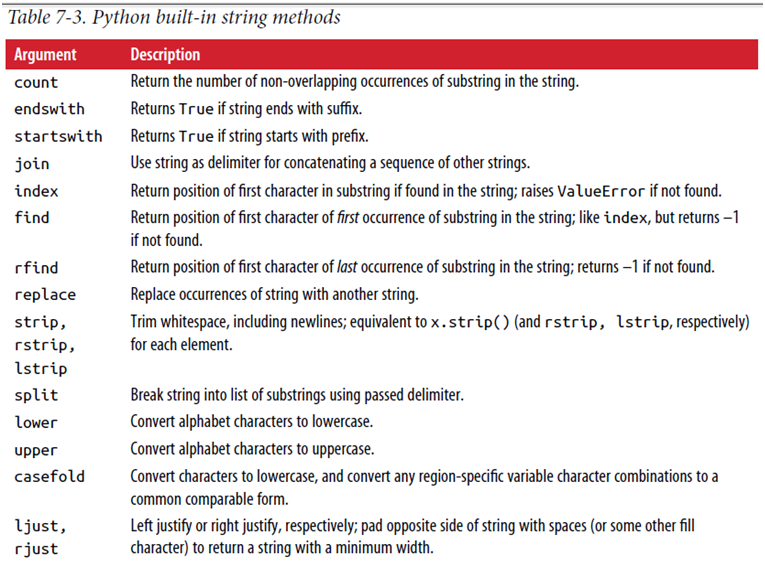

### Regular Expressions

In [ ]:
#Regular expressions provide a flexible way to search or match (often more 
#complex) string patterns in text. A single expression, commonly called a regex, 
#is a string formed according to the regular expression language. Python’s 
#built-in re module is responsible for applying regular expressions to strings




#The re module functions fall into three categories: 
#->pattern matching, 
#->substitution and
#->splitting. 
#Naturally these are all related; a regex describes a pattern to locate in the
#text, which can then be used for many purposes

In [ ]:
#suppose we wanted to split a string with a variable number of whitespace 
#characters (tabs, spaces, and newlines). The regex describing one or more 
#whitespace characters is \s+:
import re
text = "foo    bar\t baz  \tqux"
print(text)
re.split('\s+', text)     #    *, + one or more occurence of spaces (single space / tab space or any combination)

foo    bar	 baz  	qux


['foo', 'bar', 'baz', 'qux']

In [ ]:
#When you call re.split('\s+', text), the regular expression is first compiled, 
#and then its split method is called on the passed text. You can compile the 
#regex yourself with re.compile, forming a reusable regex object
regex = re.compile('\s+')
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [ ]:
#to get a list of all patterns matching the regex, use the findall method:
regex.findall(text)



#To avoid unwanted escaping with \ in a regular expression, use raw
#string literals like r'C:\x' instead of the equivalent 'C:\\x'.

['    ', '\t ', '  \t']

In [ ]:
#Creating a regex object with re.compile is highly recommended if you intend to
#apply the same expression to many strings; doing so will save CPU cycles.




#match and search are closely related to findall. While findall returns all 
#matches in a string, search returns only the first match. More rigidly, match 
#only matches at the beginning of the string. As a less trivial example, let’s 
#consider a block of text and a regular expression capable of identifying most 
#email addresses
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
text
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

# re.IGNORECASE makes the regex case-insensitive
regex = re.compile(pattern, flags=re.IGNORECASE)

In [ ]:
#Using findall on the text produces a list of the email addresses:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [ ]:
#search returns a special match object for the first email address in the text. 
#For the preceding regex, the match object can only tell us the start and end 
#position of the pattern in the string
m = regex.search(text)
print(m)
text[m.start():m.end()]

<_sre.SRE_Match object; span=(5, 20), match='dave@google.com'>


'dave@google.com'

In [ ]:
#regex.match returns None, as it only will match if the pattern occurs at the 
# start of the string:
print(regex.match(text))

None


In [ ]:
#sub will return a new string with occurrences of the pattern replaced by the
#a new string:
print(regex.sub('REDACTED', text))

Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED



In [ ]:
#Suppose you wanted to find email addresses and simultaneously segment each
#address into its three components: username, domain name, and domain suffix. 
#To do this, put parentheses around the parts of the pattern to segment:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
regex = re.compile(pattern, flags=re.IGNORECASE)

In [ ]:
#A match object produced by this modified regex returns a tuple of the 
#pattern components with its groups method:
m = regex.match('wesm@bright.net')
m.groups()

('wesm', 'bright', 'net')

In [ ]:
#findall returns a list of tuples when the pattern has groups:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

In [ ]:
#sub also has access to groups in each match using special symbols like \1 and 
#\2. The symbol \1 corresponds to the first matched group, \2 corresponds to the 
#second, and so forth:
print(regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text))

Dave Username: dave, Domain: google, Suffix: com
Steve Username: steve, Domain: gmail, Suffix: com
Rob Username: rob, Domain: gmail, Suffix: com
Ryan Username: ryan, Domain: yahoo, Suffix: com



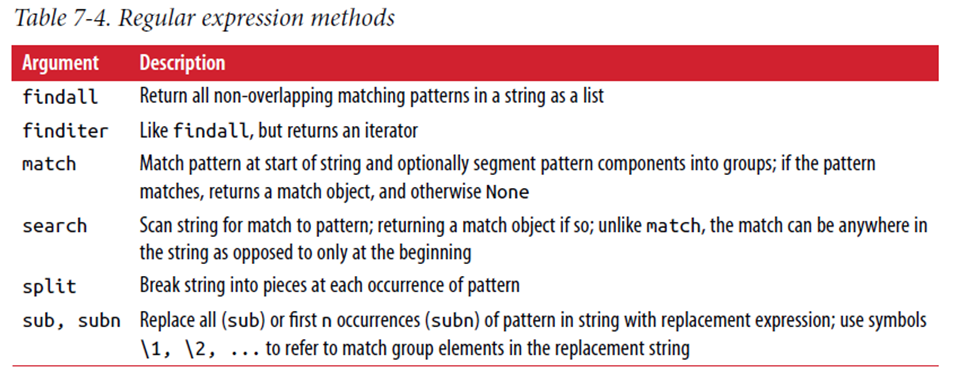

### Vectorized String Functions in pandas

In [ ]:
#Cleaning up a messy dataset for analysis often requires a lot of string munging 
#and regularization. To complicate matters, a column containing strings will 
#sometimes have missing data


#Data wrangling, sometimes referred to as data munging, is the process of 
#transforming and mapping data from one "raw" data form into another format with 
#the intent of making it more appropriate and valuable for a variety of 
#downstream purposes such as analytics.

In [ ]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = pd.Series(data)
data
data.isnull()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

In [ ]:
#You can apply string and regular expression methods can be applied 
#(passing a lambda or other function) to each value using data.map, 
#but it will fail on the NA (null) values. To cope with this, Series has 
#array-oriented methods for string operations that skip NA values. These are 
#accessed through Series’s str attribute; for example, we could check whether 
#each email address has 'gmail' in it with str.contains:
data.str.contains('gmail')

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [ ]:
#Regular expressions can be used, too, along with any re options like IGNORECASE
pattern
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [dave@google.com]
Steve    [steve@gmail.com]
Rob        [rob@gmail.com]
Wes                    NaN
dtype: object

In [ ]:
#There are a couple of ways to do vectorized element retrieval. 
#Either use str.get or index into the str attribute:
matches = data.str.match(pattern, flags=re.IGNORECASE)
matches

Dave     True
Steve    True
Rob      True
Wes       NaN
dtype: object

In [ ]:
#To access elements in the embedded lists, we can pass an index to either 
#of these functions:
matches.str.get(0)
#type(matches)
#print(matches.index)
#matches.str[0]

AttributeError: ignored

In [ ]:
#vIn = True
#vOut = str(vIn)
#type(vOut)

#s=pd.Series(['a','b','c'])
#s.str.get(0)

b=pd.Series([True,False, True])
b.str.get(1)

#b.str[0]



AttributeError: ignored

In [ ]:
#Series.str.get(self, i)[source]
#Extract element from each component at specified position.

#Extract element from lists, tuples, or strings in each element in the Series/Index.

#Parameters
#i: int - Position of element to extract.

# Returns - Series or Index

s = pd.Series(["String",(1, 2, 3),["a", "b", "c"],123,-456,
              {1: "Hello", "2": "World"}])

s.str.get(1)

0        t
1        2
2        b
3      NaN
4      NaN
5    Hello
dtype: object

In [ ]:
c#You can slice strings using this syntax:

data.str[:5]

NameError: ignored

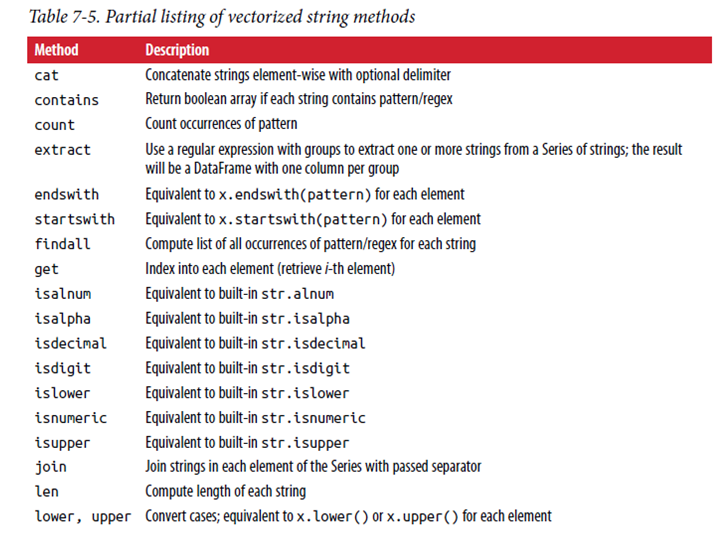

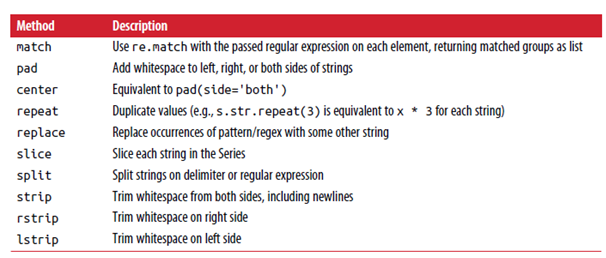

In [ ]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

## Conclusion
Effective data preparation can significantly improve productive by enabling you to spend more time analyzing data and less time getting it ready for analysis